## Necessary Imports

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

## Generate Dataset

(1000, 2) (1000,)


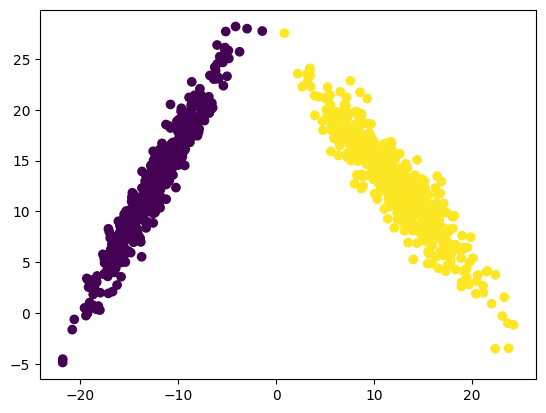

In [ ]:
# Generating a synthetic classification dataset with two distinct features
x, y = make_classification(
    n_samples=1000,
    n_features=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=2.5,
    flip_y=0.0,
    scale=5.0,
    random_state=42
)

# Transforming the target labels from [0, 1] to [-1, 1] for Perceptron compatibility
y = np.where(y == 0, -1, 1)

# Verifying the dimensions of the feature matrix and the label vector
print(x.shape, y.shape)

# Initializing a scatter plot to visualize the spatial distribution of classes
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

## Split into train and test

In [ ]:
# Splitting the dataset into training and testing subsets using an 80/20 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 2)
(200, 2)
(800,)
(200,)


## Custom Perceptron Implementation

In [ ]:
class myperceptron:
    def __init__(self, num_features, lr):
        # Initializing the weight vector with zeros, including an extra slot for the bias
        self.W = np.zeros((num_features + 1))
        # Assigning the learning rate to control the step size during updates
        self.lr = lr

    def signum(self, x):
        # Applying a step function to determine the class based on the input sign
        if x >= 0:
            return 1
        else:
            return -1


    def forward(self, x):
        # Appending a constant 1 to the input vector to account for the bias term
        x = np.append(x, [1])
        # Calculating the dot product and passing it through the activation function
        res = self.signum(self.W @ x)
        return res

    def loss_fn(self, pred, target):
        # Multiplying prediction and target to check if the classification is correct
        return pred * target

    def update(self, error, input, target):
        # Checking if a misclassification occurred (where error < 0)
        if error < 0:
            # Extending the input vector with a bias trigger before updating
            input = np.append(input, [1])
            # Adjusting the weight vector by moving it toward the target class
            self.W = self.W + self.lr * input * target

## Training

In [ ]:
lr = 2026

# Instantiating the perceptron model with the required feature count and learning rate
model = myperceptron(x.shape[1], lr)
misclassifications = []
num_misclassifications = np.inf   # initially
epoch = 0

# Executing the training loop until the model achieves perfect linear separation
while num_misclassifications > 0:
    num_misclassifications = 0
    # Iterating through every sample in the training dataset
    for i in range(len(x_train)):
        # Performing a forward pass to generate a class prediction
        pred = model.forward(x_train[i])
        # Calculating the error by comparing the prediction against the actual label
        error = model.loss_fn(pred, y_train[i])

        # Tracking the count of incorrect predictions within the current epoch
        if error < 0:
            num_misclassifications += 1

        # Updating the weight vector whenever a misclassification is detected
        model.update(error, x_train[i], y_train[i])

    # Incrementing the epoch counter after completing a full pass of the data
    epoch += 1
    # Appending the total error count to a list for later performance analysis
    misclassifications.append(num_misclassifications)
    print(f"Number of misclassifications: {num_misclassifications} in epoch {epoch}")

Number of misclassifications: 8 in epoch 1
Number of misclassifications: 3 in epoch 2
Number of misclassifications: 0 in epoch 3


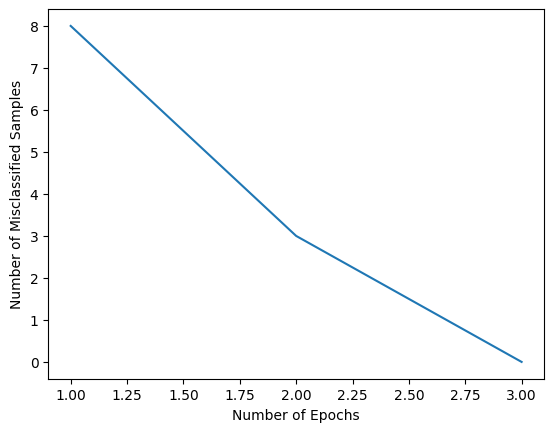

In [ ]:
plt.plot(np.arange(1,epoch+1), misclassifications)
plt.xlabel('Number of Epochs')
plt.ylabel('Number of Misclassified Samples')
plt.show()

## Visualizing the Decision Boundary

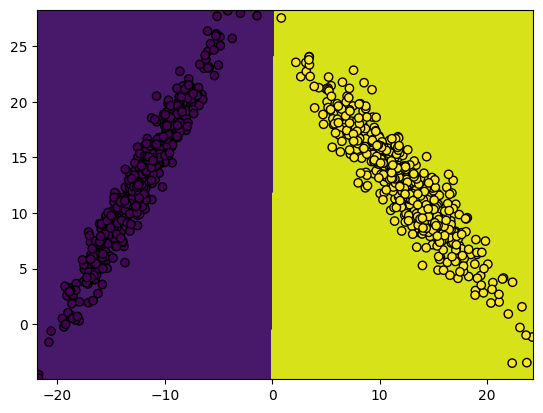

In [ ]:
# Constructing a coordinate grid spanning the entire feature space
feature_1, feature_2 = np.meshgrid(
    np.linspace(x[:,0].min()-0.1, x[:, 0].max()+0.1, 500),
    np.linspace(x[:, 1].min()-0.1, x[:, 1].max()+0.1, 500)
)

# Flattening and stacking the coordinates to prepare for batch prediction
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T

# Generating predictions for every point on the grid and reshaping into a 2D map
preds = np.reshape([model.forward(grid[i]) for i in range(len(grid))], feature_1.shape)

# Initializing the display object with the grid coordinates and model responses
display = DecisionBoundaryDisplay(xx0=feature_1, xx1=feature_2, response=preds)
display.plot()
display.ax_.scatter(x[:, 0], x[:, 1], c=y, edgecolor="black")
plt.show()

## Check accuracy on Test Dataset


In [ ]:
preds = [model.forward(x_test[i]) for i in range(len(x_test))]
print("Accuracy on Test Set:", accuracy_score(y_test, preds))

Accuracy on Test Set: 1.0


## Train the sklearn variant and check test set accuracy

In [ ]:
num_iters=100
model = Perceptron(eta0=lr, max_iter=num_iters)
model.fit(x_train, y_train)
preds = model.predict(x_test)
print("Accuracy on Test Set:", accuracy_score(y_test, preds))

Accuracy on Test Set: 1.0


## Assignment 2

1.  Load the iris dataset from sklearn (1 Mark)
2.  Split the dataset into train and test sets in a ratio of 70%-30%(1 Mark)
3.  Implement the perceptron algorithm from scratch and fit the perceptron model on the training set. Terminate the learning of each classifier when the number of misclassified samples stops reducing any further. (Hint 1: How many perceptron classifiers do we need? Hint 2: Two different models output 1 who wins?) (8 Marks)
4.  Plot the variation of the number of misclassified examples with the number of iterations of each perceptron classifier. (2 Marks)
5.  Generate the predictions on the test set, and report the accuracy, precision and recall performances. (2 Marks)  
6.  Generate the class predictions with sklearn’s implementation of perceptron. Compare the corresponding performance metrics (accuracy, precision, recall) with your implementation.  (5 Marks)
7.  From the performances obtained, what can you conclude about the separability of the dataset? Are any of the classes linearly separable from the others? Justify your answer (1 Mark)
